### Data Set:

In [1]:
#importing the necessary libraries
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy.stats as sts
import seaborn as sns

<b>Why I choose this dataset and the variables:<b>
    
As everyone knows, Argentians have a deep love for football, and coming to this coutry I could see that. Whenever I went to any restaurant or small grocery shop, I could see more than half of the time there would be some football match playing on the TV. It was also clear how everyone did not just enjoy playing this sport but would actually engage in it as on every street corner I could find at least one kid who would have a Argentina Football shirt just playing around with the football. This encoruaged me to pick a dataset that was related to football in Argentina. However, I was still unclear on how should I go about it. Do I go with the calendar goals of Argentians footballers over the years, do I jsut stick with one player? None of these ideas sparked my curiosity. 

One day, I was just casually playing FIFA (a footbal video game) and choose Argentina's national team. While playing with this team I realized how good Messi's dribbling was as he went through the defence like hot knife through butter. That made me think, if Messi has good driblling than he should probably have good ball control. I wanted to delve deeper into this idea and thus I came to the conslusion of using FIFA statistics as my dataset and checking how well dribbling would predict the ball control of the argentian players.

In [2]:
#inital full dataset
#if not working use this line
#df = pd.read_csv('Footballdata.csv')
df = pd.read_csv('https://raw.githubusercontent.com/yousaf789/CP191-Round-1/main/Footballdata.csv')
df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


For my dataset, I choose FIFA video games dataset that has all the statistics for each player in the game. The problem was it had information of players of all nationality. So I had to clean the data to ensure that I was only looking at Argentian players thus Argentinafying the dataset and assigning it to a new variable. Next I had to check for the two variables I was interested in, Dribbling and Ball Control, and assigned them to the proper variables, data_x, data_y respectively.

In [3]:
#specifying for Argentians
df2 = df[df['Nationality'] == 'Argentina']
df2.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
14,Gonzalo Higuaín,Argentina,Sub,9.0,Juventus,ST,9.0,07/26/2016,2021.0,89,...,80,74,62,70,88,5,5,7,12,10
17,Sergio Agüero,Argentina,Sub,7.0,Manchester City,ST,10.0,07/28/2011,2020.0,89,...,84,82,72,80,85,11,13,6,15,14
43,Paulo Dybala,Argentina,Sub,21.0,Juventus,CAM,21.0,07/01/2015,2020.0,86,...,88,88,82,84,88,5,5,4,4,8
53,Ángel Di María,Argentina,LW,11.0,PSG,RW,11.0,08/06/2015,2019.0,86,...,79,83,72,73,77,12,10,11,7,11


In [5]:
data_x = np.array(df2['Dribbling'])
order = np.argsort(data_x)
data_x = data_x[order]
data_y = np.array(df2['Ball_Control'])[order]

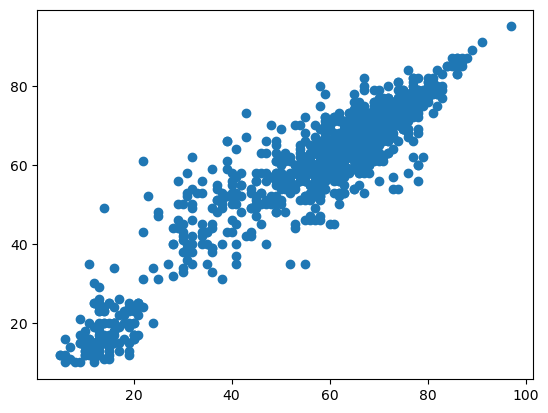

In [4]:
#plotting the Dribbling with Ball_Control just to check their correlation
plt.scatter(df2['Dribbling'], df2['Ball_Control'])

Looking at the data we can see it follows a generally linear relationship. There are some outlier values in the data and I expect regression line woul be impacted by them.

### Normal Likelihood Model:

Firstly, I used a Normal model with the following paramters:

Likelihood:
$$y_{i} \sim Normal(\mu, \sigma^{2})$$
$$\mu_{i} = c_{0} + c_{1}x_{i}$$
Prior:
$$c_{0} \sim Uniform(0, 100)$$
$$c_{1} \sim Normal(0, 5^{2})$$
$$\sigma \sim Uniform(0, 100)$$

We can see that the mean of the normal distribution comes from a linear model with the paramters $c_{0}$, the y-intercept, $c_{1}$, the slope, and $x_{i}$, the data points. While the $\sigma$ comes from a uniform ditribution. Thus we have to look at the following priors: $c_{0}$, $c_{1}$, $\sigma$ to get our Normal Distribution.

Based on my prior knoweldge about FIFA I know that the statistics lie in between 0 and 100 thus defining $c_{0}$ to have a uniform ditribution over 0 to 100 is plausible. The same can be said for the $\sigma$ as the values for the stats can be distributed anywhere between 0 and 100. Looking at $c_{1}$ we are defining all possible slopes as before looking at the data I was still not sure whether there is a positve, negative or no correlation between dribbling and ball control and this will capture that assumption well, we choose priors before looking at data. I assumed there to be a linear realtionship between dribbling and ball control that is why I stuck with only two c values as a quadratic or cubic fit would not make sense based on what I know about the variables. The model has lighter tails which would mean having outliers can affect the model quite a bit.

In [6]:
# Code retrieved from: Session 8. Robust Linear Regression PCW
# setting up the normal model
with pm.Model() as normal_model:
    # Prior
    c0 = pm.Uniform('c0', lower=0, upper=100)
    c1 = pm.Normal('c1', mu=0, sigma=5)
    sigma = pm.Uniform('sigma', lower=0, upper=100)
    # Data
    x = pm.MutableData('x', data_x)
    y = pm.MutableData('y', data_y)
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1 * x)
    # Likelihood
    pm.Normal('likelihood', mu=mu, sigma=sigma, observed=y)


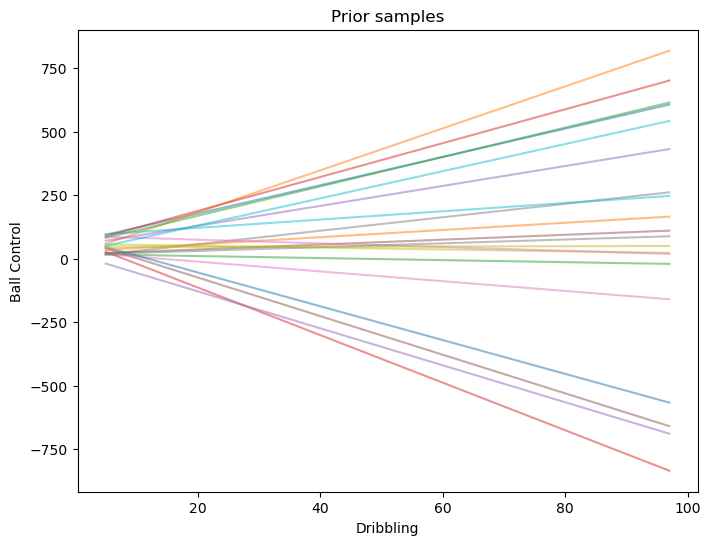

In [42]:
#Code retrieved from: Session 7. Linear Regression
with normal_model:
    inference_prior_normal = pm.sample_prior_predictive(20)

plt.figure(figsize=(8, 6))
plt.title('Prior samples')
plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
x = np.array([data_x.min(), data_x.max()])
y = (
    inference_prior_normal.prior.c0.values +
    x.reshape(-1, 1) * inference_prior_normal.prior.c1.values)
plt.plot(x, y, alpha=0.5)
plt.show()

The prior predictive is able to take into account all possible regression lines, whether they are positive or negative. This happens because the model does not know how the data is actually distributed. The wide prior indicates that the model has still not learned anything which is a good indicator for future as it can narrow down once it starts to learn. If the model was restricted from the start, the model could have missed some important trends.

In [8]:
with normal_model:
    # high sample value used to account for the large data set used
    normal_inference_all = pm.sample(5000)
    pm.sample_posterior_predictive(normal_inference_all, extend_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 51 seconds.


We can see from the plot below that a linear regression line seems to fit the data points pretty well as the data mostly lies on this line and is somewhat equally distributed above and below the line. It is able to capture the information for most of the data points perfectly. Thus we can say that the model was able to generate decent values for our posterior thus giving us a good linear line. However, we need to be aware of the fact that the regression line is somewhat skewed towards the outliers, even if it is not evident here. If we were to go ahead and manually adjust the data points to remove all the outliers, the model will be biased and thus will not be practical.

As mentioned during the model description, normal distribution has very light tails. In simple terms, this would mean that according to the model proabbility of observing the outlier is very low, however, we can still see that our dataset shows the otuleir. Thus the posterior distribution has to make its $\sigma$ larger to account for it.

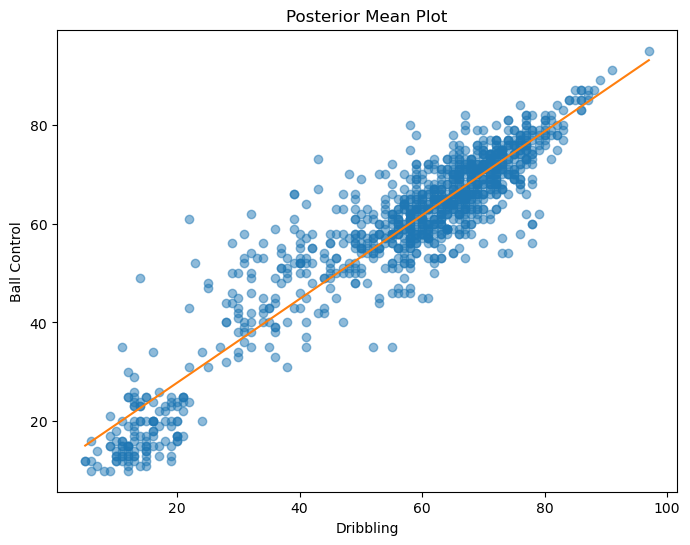

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Posterior Mean Plot')


plt.scatter(data_x, data_y, alpha=0.5)



y = (
    normal_inference_all.posterior.c0.values.mean() +
    data_x * normal_inference_all.posterior.c1.values.mean())

plt.plot(data_x, y, color='C1')

plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
plt.show()

Looking at the inference summary table below we see that our sampling was good. The ESS values are well above the criteria required for it as they are clearly more than 10% of the samples. Looking at the $\hat{r}$ values we can see they are also good as they are at 1.0, thus showing that the sampler converged, which would mean that all the Markov chains sample evently from the same distribution. Looking at the rank plots confirms this as the distribution for all the chains for all the rank plots looks uniform.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,10.851,0.585,9.724,11.911,0.007,0.005,7998.0,7464.0,1.0
c1,0.848,0.010,0.830,0.866,0.000,0.000,8072.0,8219.0,1.0
sigma,6.332,0.135,6.082,6.590,0.001,0.001,10041.0,9426.0,1.0


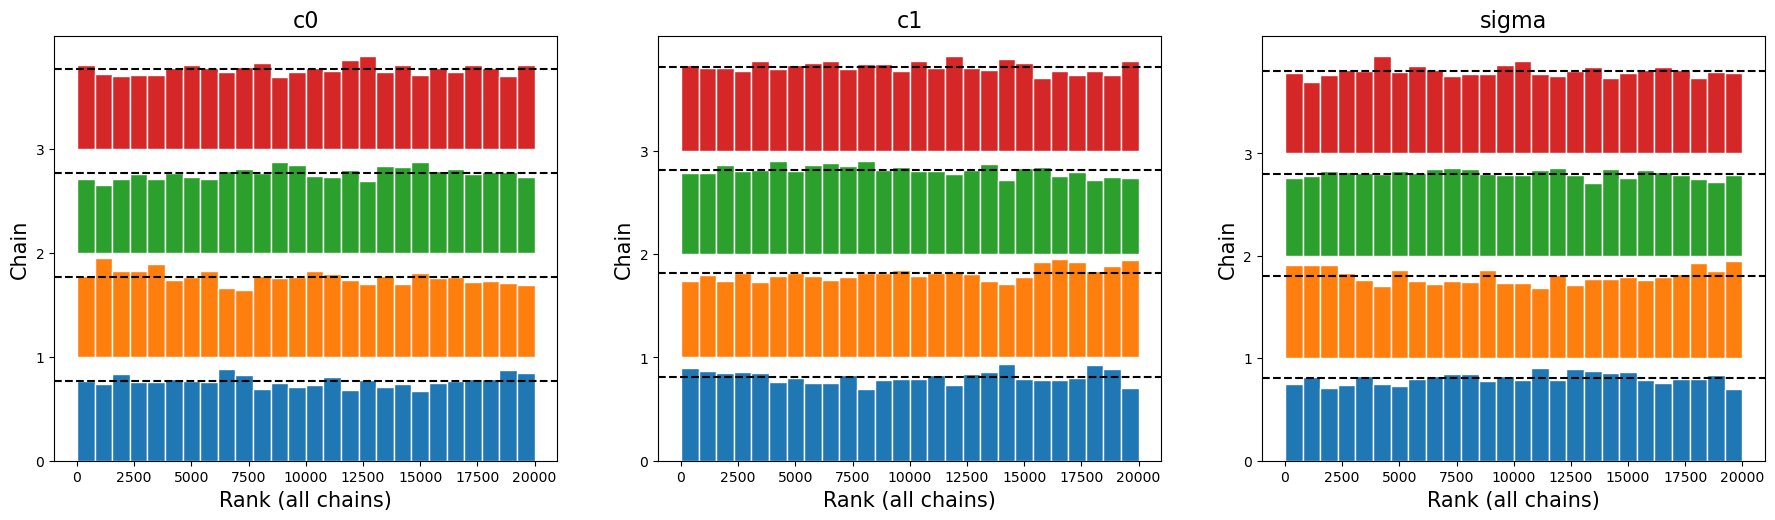

In [10]:
az.plot_rank(normal_inference_all, var_names=['c0', 'c1', 'sigma'])
az.summary(normal_inference_all, var_names=['c0', 'c1', 'sigma'])

### Student T model:

Secondly, I used a Student T model with the following paramters:

Modified likelihood:
$$y_{i} \sim T(\nu, \mu_{i}, \sigma)$$
$$\mu_{i} = c_{0} + c_{1}x_{i}$$
Prior:
$$c_{0} \sim Uniform(0, 100)$$
$$c_{1} \sim Normal(0, 5^{2})$$
$$\sigma \sim Uniform(0, 100)$$
$$\nu \sim Half-Normal(\sigma=30)$$

We have previously discussed some problems with the normal model regrading its tails. The Student T model tries to overcome these problems by having an additional paramter $\nu$ that adjusts for the lightness of the tails. If $\nu$ has a higher value, the model will have lighter tails and thus as it becoemns bigger and bigger the T distribution starts to look like the Normal Distribution.

Most of the priors for this model are same as the normal model as we have simillar prior knoweldge for both cases. The addition of $\nu$ is different. We know that $\nu$ is the positive half of a Normal(0, 30^{2}) distribution as $\nu > 0$. Using the scale paramter of 30 allows us to get values for $\nu$ that make the T distribution look Normal, thus allowing our model to adapt to whether or not there are outliers while also ensuring it remains positive. This model has a heavier tail comapred to the normal model which would ensure that it is learning less from the outliers.

In [11]:
# Code retrieved from: Session 8. Robust Linear Regression PCW
with pm.Model() as t_model:
    # Prior
    c0 = pm.Uniform('c0', lower=0, upper=100)
    c1 = pm.Normal('c1', mu=0, sigma=5)
    sigma = pm.Uniform('sigma', lower=0, upper=100)
    nu = pm.HalfNormal('nu', sigma=30)  # <== THIS LINE IS NEW
    # Data
    x = pm.MutableData('x', data_x)
    y = pm.MutableData('y', data_y)
    # Regression mean
    mu = pm.Deterministic('mu', c0 + c1 * x)
    # Likelihood
    pm.StudentT('likelihood', nu=nu, 
                mu=mu, sigma=sigma, observed=y)

We can see that prior samples for our T model is also well spread out which in general again is a good indication that our model is working correctly based on our priors. However, if we focus on the model we can see it is less affected by the outlier and is concentarted more in the middle as compared to the normal model while also having lines which have generally a higher slope.

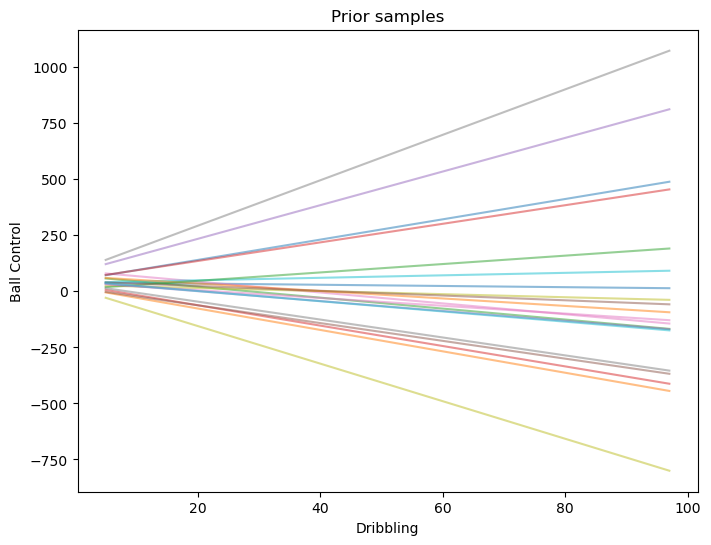

In [47]:
#Code retrieved from: Session 7. Linear Regression
with t_model:
    inference_prior_t = pm.sample_prior_predictive(20)

plt.figure(figsize=(8, 6))
plt.title('Prior samples')
plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
x = np.array([data_x.min(), data_x.max()])
y = (
    inference_prior_t.prior.c0.values +
    x.reshape(-1, 1) * inference_prior_t.prior.c1.values)
plt.plot(x, y, alpha=0.5)
plt.show()

In [13]:
# Code retrieved from: Session 8. Robust Linear Regression PCW
with t_model:
    t_inference_all = pm.sample(5000)
    pm.sample_posterior_predictive(t_inference_all, extend_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c0, c1, sigma, nu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 60 seconds.


Again we can see that the linear regression line plotted using the posterior samples from the T model seems to fit the dataset pretty well which would again show that the model is a good fit for the data but we cannot come to any conlusion without comparing it with other models.

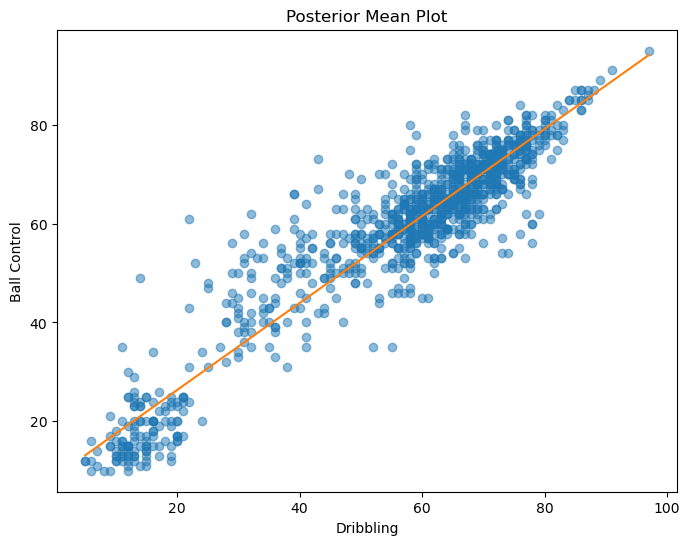

In [14]:
plt.figure(figsize=(8, 6))
plt.title('Posterior Mean Plot')


plt.scatter(data_x, data_y, alpha=0.5)



y = (
    t_inference_all.posterior.c0.values.mean() +
    data_x * t_inference_all.posterior.c1.values.mean())

plt.plot(data_x, y, color='C1')

plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
plt.show()

We can look at the inference summary table to see how well the T model has carried out its sampling. First we can see the ESS values which are again well above the criteria of at least being 10% of the sample size. Next, we can see the r_hat values which are all 1.0 for all parameters which is pretty good. Next we can look at the rank plots and see that they all look uniform which would thus backup the 1.0 value for $\hat{r}$ and thus would explain that the sampling was good.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,8.728,0.588,7.635,9.861,0.007,0.005,8053.0,9353.0,1.0
c1,0.880,0.009,0.863,0.899,0.000,0.000,8174.0,9320.0,1.0
sigma,4.690,0.190,4.334,5.042,0.002,0.001,8860.0,9764.0,1.0
nu,4.170,0.599,3.139,5.303,0.007,0.005,8898.0,9103.0,1.0


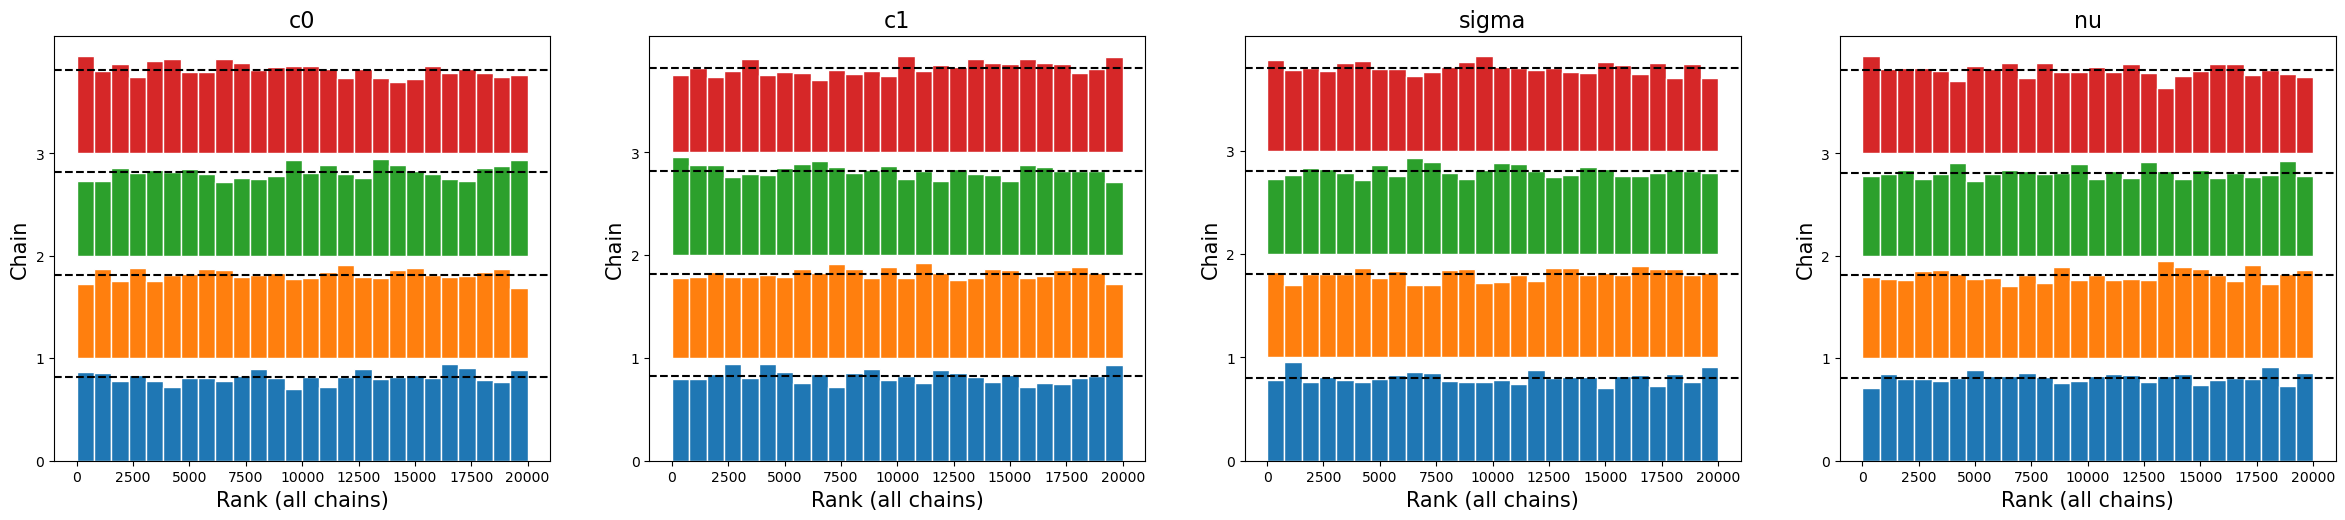

In [15]:
az.plot_rank(t_inference_all, var_names=['c0', 'c1', 'sigma', 'nu'])
az.summary(t_inference_all, var_names=['c0', 'c1', 'sigma', 'nu'])

### Outlier Model:

Lastly, I used a Outlier Classifier model with the following paramters:

Likelihood:
$$y_{i} \sim Normal(\mu_{i}, \sigma_{i})$$
$$\mu_{i} = c_{0} + c_{1}x_{i}$$
$$\sigma_{i}=\begin{equation}
\left\{ 
  \begin{aligned}
    \sigma_{in} \text{       } & &if q_{i} = 0\\
    \sigma_{in} + \sigma_{out} & &if q_{i} = 0\\
  \end{aligned}
  \right.
\end{equation}
$$
$$q_{i} \sim Bernoulli(p)$$
Prior:
$$c_{0} \sim Uniform(0, 100)$$
$$c_{1} \sim Normal(0, 5^{2})$$
$$\sigma_{in} \sim Uniform(0, 100)$$
$$\sigma_{out} \sim Half-Normal(\sigma=13)$$
$$p \sim Uniform(0, \frac{1}{2})$$


We can see that the priors are mostly similar to the normal model, like in its use of the Normal likelihood with parameters $\mu$, and $\sigma$, with the only differnce being in the $\sigma$ values. We see that we now have to define two $\sigma$ values, one for in and one for out. The $\sigma_{in}$ value is similar to the normal models $\sigma$ value, while the $\sigma$ out has the same distribution as $\nu$ from the T model. The reasoning for this choise of parameter is as based on my prior knoweldge about FIFA stats I know that there cannot be a lot variation for the outliers from the true value so thus I came up with $\sigma = 13$ for it. 

We can also see we are getting the value of p over a uniform distribution to get a value between 0 and 0.5. This will be used by the Bernoulli distribution in likelihood to give us either a value fo 1 or 0 based of of which we will deduce whether the posterior sample we are looking at is an outlier or not. We also know for a fact that the the sum of $\sigma_{in}$ and $\sigma_{out}$ wil be greater than $\sigma_{in}$ thus we use the sum $\sigma$ value when we have detected an outlier and only $\sigma_{in}$ when there is no outlier.

In [16]:
# Code retrieved from: Session 8. Robust Linear Regression PCW
import aesara.tensor as at

with pm.Model() as outlier_model:
    
    # Observed variables
    x = pm.MutableData('x', data_x)
    y = pm.MutableData('y', data_y)
    
    # Linear regression
    c0 = pm.Uniform('c0', lower=0, upper=100)
    c1 = pm.Normal('c1', mu=0, sigma=5)
    mu = pm.Deterministic('mu', c0 + c1 * x)
    
    # Noise parameters for inliers and outliers
    sigma = pm.Uniform('sigma', lower=0, upper=100)
    sigma_out = pm.HalfNormal('sigma_out', sigma=13)
    sigmas = at.as_tensor_variable([sigma, sigma + sigma_out])

    # In/out class assignment probability and indicators
    p = pm.Uniform('p', lower=0, upper=0.5)
    is_outlier = pm.Bernoulli('is_outlier', p=p, size=x.shape[0])
    
    pm.Normal('likelihood', mu=mu, sigma=sigmas[is_outlier], observed=y)

Again we can say the same for our outlier classifier model, the priors are well spread out but are comapratively more compact when comapre to the other two model thus showing the mdoel is trying to minimize the effect of the outliers.

We cna see below that the prior predictive plot follow a very similar pattern to the Student T model, howveer, the line that reaches the peak and minimum y value is lower. This mioght be due to the decrease we had in our prior regarding the $\sigma_{out}$.

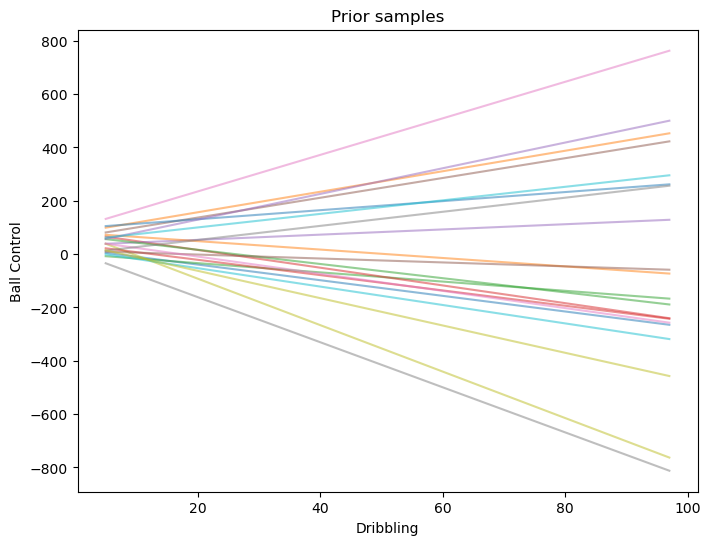

In [49]:
#Code retrieved from: Session 7. Linear Regression
with outlier_model:
    inference_prior_outlier = pm.sample_prior_predictive(20)

plt.figure(figsize=(8, 6))
plt.title('Prior samples')
plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
x = np.array([data_x.min(), data_x.max()])
y = (
    inference_prior_outlier.prior.c0.values +
    x.reshape(-1, 1) * inference_prior_outlier.prior.c1.values)
plt.plot(x, y, alpha=0.5)
plt.show()

In [18]:
# Code retrieved from: Session 8. Robust Linear Regression PCW
with outlier_model:
    outlier_inference_all = pm.sample(5000)
    pm.sample_posterior_predictive(outlier_inference_all, extend_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [c0, c1, sigma, sigma_out, p]
>BinaryGibbsMetropolis: [is_outlier]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 976 seconds.
C:\Users\josep\anaconda3\lib\site-packages\arviz\stats\diagnostics.py:586: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


Below we can see that the linear line formed using the posteriors form the Outlier classifier model seems to also fit the model pretty well by making a linear line which passes thrugh the almost all the datapoints, covering the heavier density of datapoints easily.

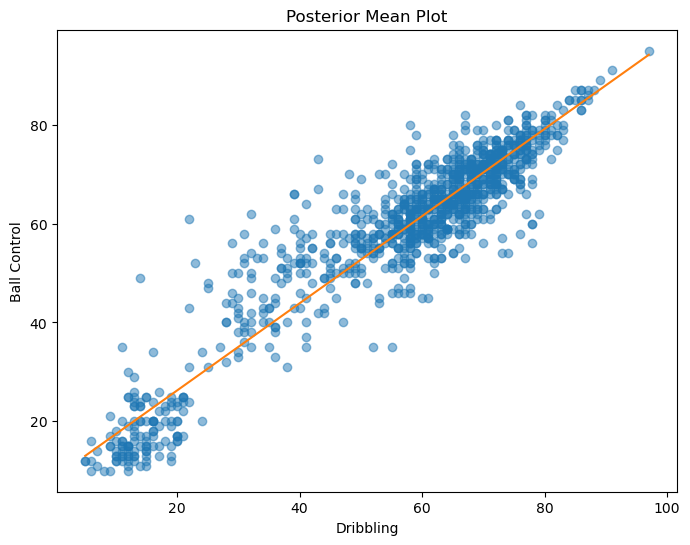

In [19]:
plt.figure(figsize=(8, 6))
plt.title('Posterior Mean Plot')


plt.scatter(data_x, data_y, alpha=0.5)



y = (
    outlier_inference_all.posterior.c0.values.mean() +
    data_x * outlier_inference_all.posterior.c1.values.mean())

plt.plot(data_x, y, color='C1')

plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
plt.show()

First Looking at the $\hat{r}$ values, we can see they are all at 1.0 which is a good sign as this would mean that sampling was pretty good for our model. However, when we look at the ESS values we can see that for $\sigma$ and p they are pretty low which would mean there might be some problems when generating the posterior, which might be due to the fact that this model is more complicated. We cna see little decrepencies in the rank plot for $\sigma$ and p when we look at their chain 1, orange, anmd chain 2, green. They seem to have a higher density in one particualr direction, however, the plots overall still look pretty normal. Oerall when we take into account the $\hat{r}$ valeus and the majority of rank plots, which look approximately uniform I would say the sampling was decent.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c0,8.599,0.592,7.477,9.710,0.010,0.007,3297.0,5202.0,1.0
c1,0.882,0.009,0.865,0.901,0.000,0.000,3429.0,5318.0,1.0
sigma,4.086,0.267,3.585,4.584,0.011,0.008,627.0,1043.0,1.0
sigma_out,5.716,0.625,4.585,6.891,0.019,0.014,1040.0,3185.0,1.0
p,0.309,0.062,0.196,0.425,0.003,0.002,448.0,842.0,1.0


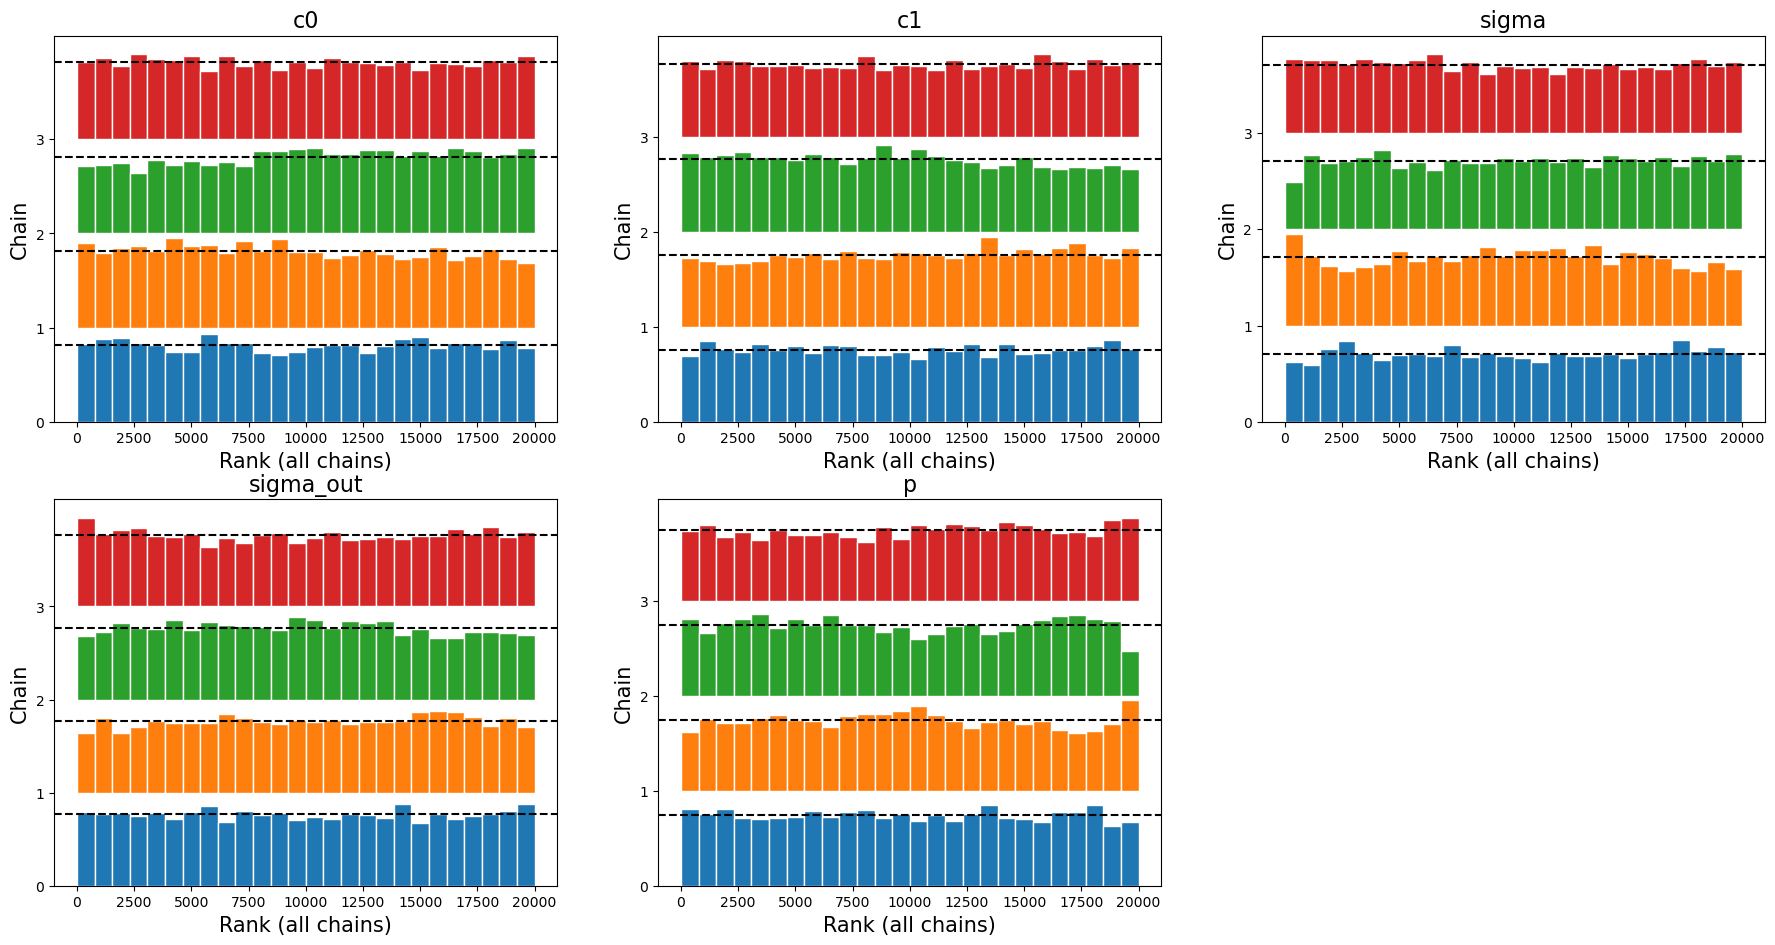

In [20]:
az.plot_rank(outlier_inference_all, var_names=['c0', 'c1', 'sigma', 'sigma_out', 'p'])
az.summary(outlier_inference_all, var_names=['c0', 'c1', 'sigma', 'sigma_out', 'p'])

When we look at the posterior mean plots together we can see that the outlier classifier and Student T model overlap thus suggesting that they have simillar results which makes sense as both of them account for the outlier and they also had a similar distribution of lines when we plotted its prior predictive while looking at the normal model we can see it is a little bit different when compared to the other two models. This will be later highlighted when we check for the PSIS visualization.

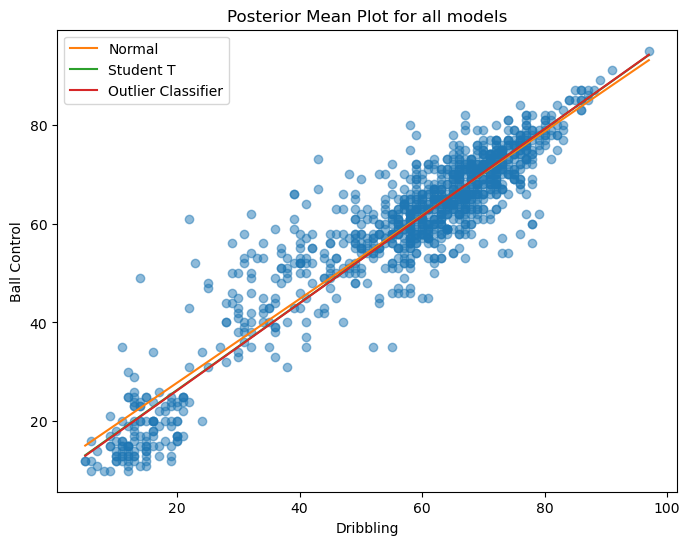

In [53]:
# plotting all posterior mean plots together
plt.figure(figsize=(8, 6))
plt.title('Posterior Mean Plot for all models')

plt.scatter(data_x, data_y, alpha=0.5)

y_normal = (
    normal_inference_all.posterior.c0.values.mean() +
    data_x * normal_inference_all.posterior.c1.values.mean())
y_t = (
    t_inference_all.posterior.c0.values.mean() +
    data_x * t_inference_all.posterior.c1.values.mean())

y_outlier = (
    outlier_inference_all.posterior.c0.values.mean() +
    data_x * outlier_inference_all.posterior.c1.values.mean())

plt.plot(data_x, y_normal, color='C1', label='Normal')
plt.plot(data_x, y_t, color='C2', label='Student T')
plt.plot(data_x, y_outlier, color='C3', label='Outlier Classifier')
plt.xlabel('Dribbling')
plt.ylabel('Ball Control')
plt.legend()
plt.show()

Looking at the predictive hdi plot below we can analyze for what posterior predictions fall within the 95% interval of the posterior mean median. The values outside the light orange line would represent the otuliers and the density of the data points highlight how much they impact our line thus we can see for the differnet models how the outliers affect them. Thus we can see that the normal model is mainly affected by the outliers as comapred to the other two models which have more importance, weightage given to the values inside the interval.

C:\Users\josep\anaconda3\lib\site-packages\arviz\stats\stats.py:1048: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
C:\Users\josep\anaconda3\lib\site-packages\arviz\stats\stats.py:812: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


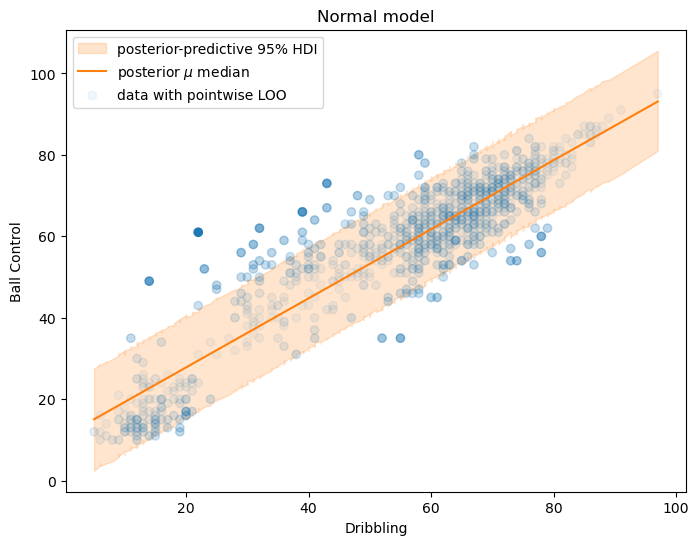

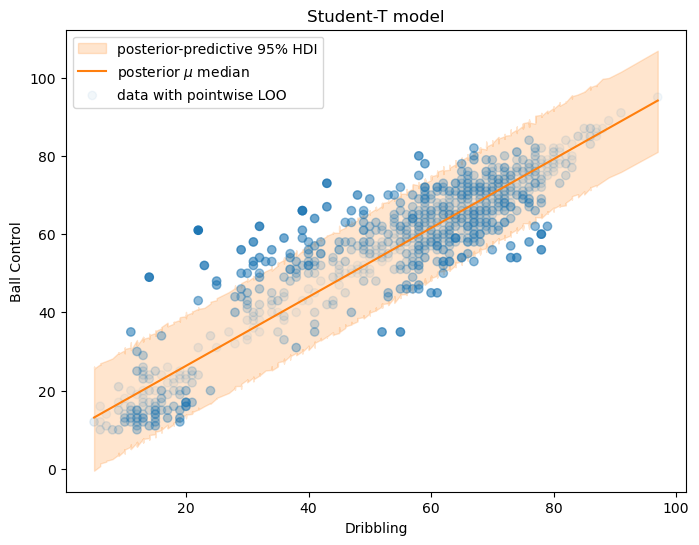

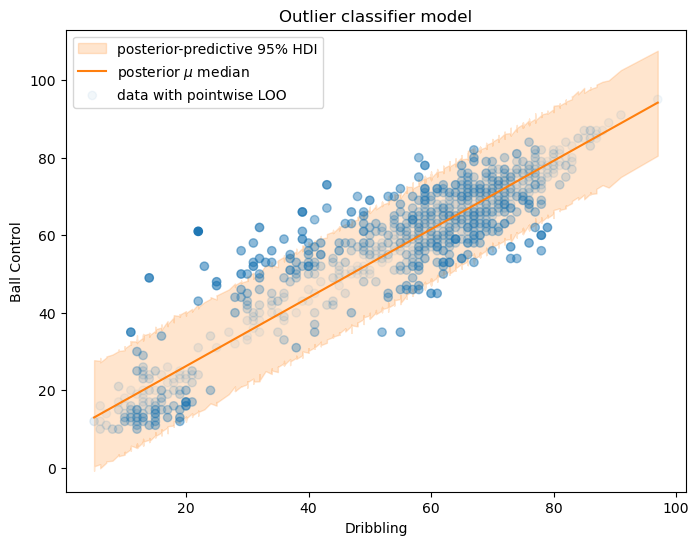

In [39]:
# Code retrieved from: Session 12. Motorcycle Crash Data
def plot_posterior_predictive_hdi(inference):
    plt.figure(figsize=(8, 6))
    plt.title('Posterior and posterior-predictive distributions')
    az.plot_hdi(
        data_x, inference.posterior_predictive.likelihood,
        hdi_prob=0.95, smooth=False, color='C1',
        fill_kwargs={'alpha': 0.2, 'label': 'posterior-predictive 95% HDI'})
    plt.plot(
        data_x, inference.posterior.mu.median(dim=['chain', 'draw']).values,
        color='C1', alpha=1, label='posterior $\mu$ median')
    
    weights = az.loo(inference, pointwise=True).loo_i.values
    alpha = 1 - 0.95 * (weights - weights.min()) / (weights.max() - weights.min())
    plt.scatter(data_x, data_y, alpha=alpha, color='C0', label='data with pointwise LOO')
    
    plt.xlabel('Dribbling')
    plt.ylabel('Ball Control')
    plt.legend()

    
plot_posterior_predictive_hdi(normal_inference_all)
plt.title('Normal model')
plot_posterior_predictive_hdi(t_inference_all)
plt.title('Student-T model')
plot_posterior_predictive_hdi(outlier_inference_all)
plt.title('Outlier classifier model')
plt.show()

We can see below that the Student T model and the outlier classifier model mainly overlaps with each other when it comes to c0 and c1 values poisterior distribution while the normal model is more towards the right in c0 and more left in c1. This again brings up the point of how outliers affect this model differently. We can see that for sigma the Student T and Outlier Classifier model have little overlap and the outlier classifier's posterior distribution is a normal distribution over lower mean for the sigma value. We can see that the Normal model has a lower value for its c1 thus showing it is affected by the outlier in the starting values of x and has lower slope as compared to the outlier classifeir and Student T model.

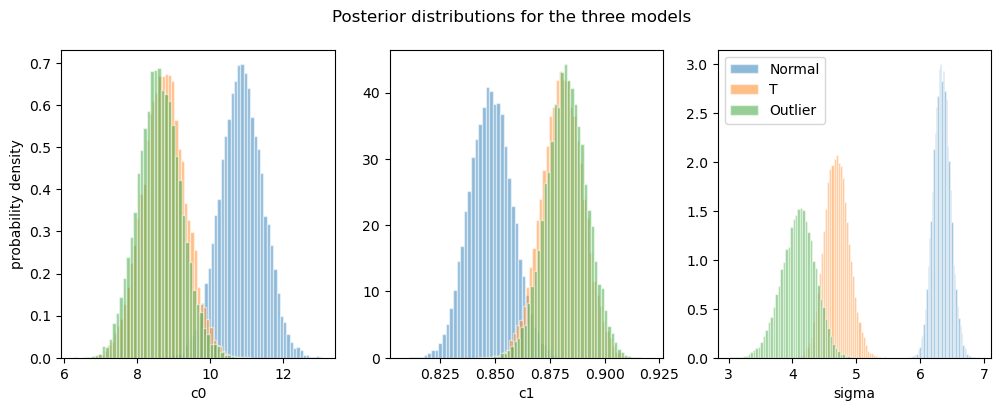

In [23]:
# Code retrieved from: Session 8. Robust Linear Regression PCW
plt.figure(figsize=(12, 4))
plt.suptitle('Posterior distributions for the three models')
for i, var in enumerate(['c0', 'c1', 'sigma']):
    plt.subplot(1, 3, i+1)
    plt.xlabel(var)
    if i == 0:
        plt.ylabel('probability density')
    plt.hist(getattr(normal_inference_all.posterior, var).values.flatten(), density=True, bins=50, edgecolor='white', 
             alpha=0.5, label='Normal')
    plt.hist(getattr(t_inference_all.posterior, var).values.flatten(), density=True, bins=50, edgecolor='white', 
             alpha=0.5, label='T')
    plt.hist(getattr(outlier_inference_all.posterior, var).values.flatten(), density=True, bins=50, edgecolor='white', 
             alpha=0.5, label='Outlier')
plt.legend()
plt.show()   

#### PSIS Analysis:

Computing PSIS will provide us information regarding the out of sample deviance, which would inform us of how good the mdoel fiits the data. PSIS follows leave-one-out-cross-validation (LOO-CV), in which we leave out one unqiue observation from the dataset and train the model on the rest of the datain order to get a prediciton for the left out value. However, in PyMC we conly approximate as actually doing that will take a lot of time and computational power.

In [25]:
comparison = az.compare({'Normal': normal_inference_all, 'T': t_inference_all, 'Outlier': outlier_inference_all}, ic='loo')
comparison

C:\Users\josep\anaconda3\lib\site-packages\arviz\stats\stats.py:1048: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
C:\Users\josep\anaconda3\lib\site-packages\arviz\stats\stats.py:812: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Outlier,0,-3520.515668,179.303249,0.000000,8.531082e-01,30.154104,0.000000,True,log
T,1,-3535.153412,4.153541,14.637744,7.147192e-14,32.007725,6.271129,False,log
Normal,2,-3582.592746,4.265106,62.077078,1.468918e-01,33.211386,15.618553,False,log


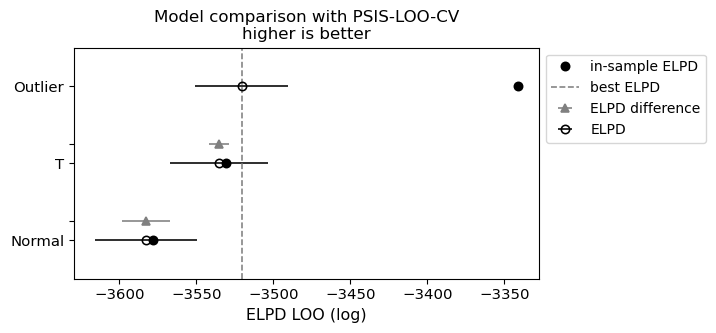

In [54]:
# Code retrieved from: Session 12. Motorcycle Crash Data
az.plot_compare(comparison)
plt.title('Model comparison with PSIS-LOO-CV\nhigher is better')
plt.xlabel('ELPD LOO (log)')
plt.legend(['in-sample ELPD', 'best ELPD', 'ELPD difference', 'ELPD'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

PyMC uses the log ELPD values which in otehr terms would just be the expected log posterior predictive density in order to make the comaprisons between the plots. We can see that the outlier classifier has the highest ELPD out of sample value, the hollow circle, thus indicating that it is able to perform the best when it comes to out of sample. This would mean that it is able to capture the general trend of the data the best while ebing the least affected by the outliers. We can see that the outlier classifier also has the highest in sample ELPD, the filled black circle, but it is not that important. The dashed triangle line would show the differnce in ELPD between the other two models in comapriosn to the best model an as we can see it doen't overlap with the Outleir classifiers out of sample ELPD thus the otulier classifer would be ebtter in all the cases when comapred to these models. Still we should know that the deviance is just an assessment of predictive accuracy,  not the tru distribution. THus this alone will not have been sufficient information to deduce that outlier classifier is the best model but combining this with the above calculations ensures it is the best.

$$Refernces:$$
Soccer Players Statistics. (2018, June 26). Kaggle. Retrieved October 15, 2022, from
https://www.kaggle.com/datasets/antoinekrajnc/soccer-players-statistics?resource=downl
oad